In [1]:
import f3dasm
import numpy as np

In [2]:
FUNCTIONS = f3dasm.functions.FUNCTIONS_2D

In [3]:
seed = 41 #np.random.randint(low=0,high=1e5)
dim = 2
domain = np.tile([-12., 12.], (dim,1))

In [4]:
func = f3dasm.functions.Shubert(seed=seed, scale_bounds=domain)

In [5]:
func._create_offset()
func.offset

array([[ -5.97783303, -10.8937003 ]])

In [6]:
x,y = func.get_global_minimum(dim)
x, y

(None, None)

In [7]:
func._create_offset()
o = func.offset
o

array([[  4.24358979, -10.95673234]])

In [8]:
func.scale_bounds

array([[-12.,  12.],
       [-12.,  12.]])

In [9]:
print(func.get_global_minimum(dim))

(None, None)


In [10]:
func.check_if_within_bounds(func.get_global_minimum(dim)[0])

TypeError: '<' not supported between instances of 'float' and 'NoneType'

AttributeError: 'NoneType' object has no attribute 'ravel'

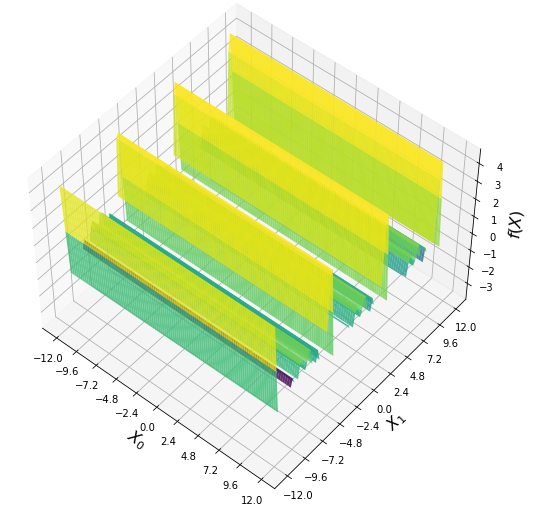

In [11]:
fig, ax = func.plot(px=100, domain=domain)
ax.scatter(*func.get_global_minimum(dim)[0].ravel(), color='r')

In [ ]:
import matplotlib.pyplot as plt
off_list, on_list = [],[]

fig,ax = plt.figure(), plt.axes()
fig2,ax2 = plt.figure(), plt.axes()

for _ in range(1000):
    func._create_offset()
    o = func.offset
    if func.check_if_within_bounds(func.get_global_minimum(d=2)[0]):
        c = 'green'
        on_list.append(o)

    else:
        c = 'red'
        off_list.append(o)

    ax.scatter(*func.offset.ravel(),color=c, s=1)
    ax2.scatter(*func.get_global_minimum(d=2)[0].ravel(),color=c, s=1)
    #print(f"{func.check_if_within_bounds(func.get_global_minimum(d=2)[0])}: {func.get_global_minimum(d=2)[0]}") 

In [ ]:
on_list = np.array(on_list)[:,0]
off_list = np.array(off_list)[:,0]

In [ ]:
print(min(on_list[:,0]), max(on_list[:,0]))
print(min(on_list[:,1]), max(on_list[:,1]))

In [ ]:
print(min(off_list[:,0]), max(off_list[:,0]))
print(min(off_list[:,1]), max(off_list[:,1]))

In [ ]:
func.offset = np.zeros(func.dimensionality)

global_minimum_method = getattr(func, "get_global_minimum", None)
if callable(global_minimum_method):
    g = func.get_global_minimum(d=func.dimensionality)[0]

    if g is None:
        g = np.zeros(func.dimensionality)

    if g.ndim == 2:
        g = g[0]

else:
    g = np.zeros(func.dimensionality)

[
    (-abs(g[d] - func.scale_bounds[d, 0]), abs(g[d] - func.scale_bounds[d, 1])
    )  # Here a bug
    for d in range(func.dimensionality)
]

In [ ]:
g

In [ ]:
func.scale_bounds

In [ ]:
0-(1-0.55)